### Source https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e

In [1]:
# importing libaries ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
from sklearn.ensemble import IsolationForest
import seaborn as sns

In [35]:
from sklearn.neighbors import LocalOutlierFactor

In [2]:
# Generating data ----

rng = np.random.RandomState(42)

In [3]:
# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

In [4]:
# Generating new, 'normal' observation
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

In [5]:
# Generating outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

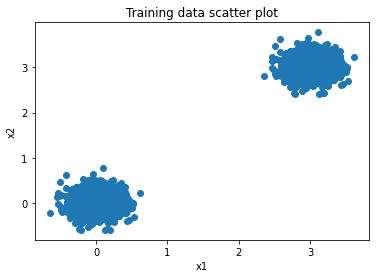

In [12]:
plt.scatter(X_train['x1'], X_train['x2'])
plt.title("Training data scatter plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

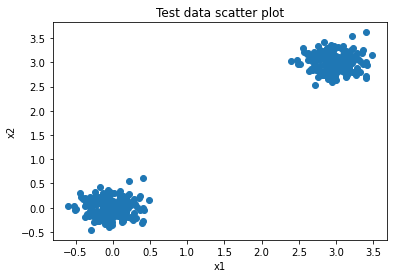

In [13]:
plt.scatter(X_test['x1'], X_test['x2'])
plt.title("Test data scatter plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

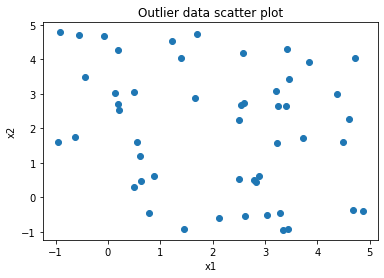

In [14]:
plt.scatter(X_outliers['x1'], X_outliers['x2'])
plt.title("Outlier data scatter plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

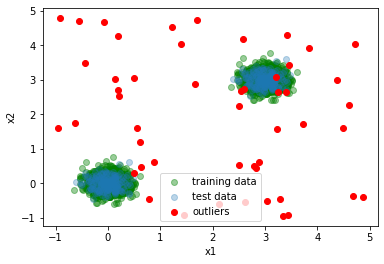

In [19]:
plt.scatter(X_train['x1'], X_train['x2'], label="training data", color='green', alpha=0.4)
plt.scatter(X_test['x1'], X_test['x2'], label="test data", alpha=0.3)
plt.scatter(X_outliers['x1'], X_outliers['x2'], label="outliers", color='red')
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [71]:
# Isolation Forest ----

# training the model
# define % of anomalies
anomalies_ratio = 0.009

clf = IsolationForest(max_samples=100, contamination = anomalies_ratio, random_state=rng)
clf.fit(X_train)

IsolationForest(contamination=0.009, max_samples=100,
                random_state=RandomState(MT19937) at 0x2252628A048)

In [40]:
#LocalOutlierFactor
clf_lof = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
clf_lof.fit(X_train)

LocalOutlierFactor(contamination=0.1, n_neighbors=5)

In [72]:
# predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [42]:
# predictions
y_pred_lof_train = clf_lof.fit_predict(X_train)
y_pred_lof_test = clf_lof.fit_predict(X_test)
y_pred_lof_outliers = clf_lof.fit_predict(X_outliers)

D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\flask_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


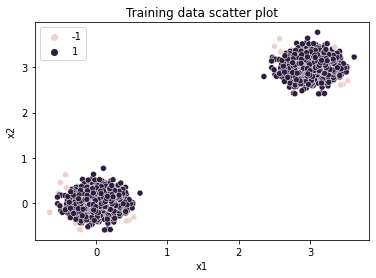

In [73]:
sns.scatterplot('x1', 'x2', data=X_train, hue=y_pred_train)
plt.title("Training data scatter plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\flask_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


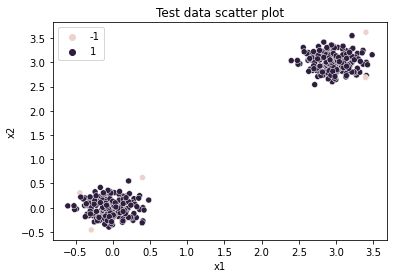

In [74]:
sns.scatterplot('x1', 'x2', data=X_test, hue=y_pred_test)
plt.title("Test data scatter plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\flask_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


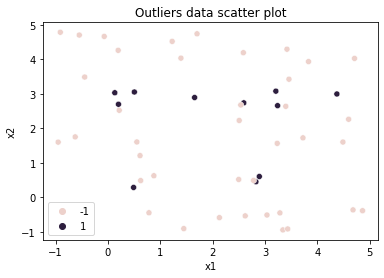

In [75]:
sns.scatterplot('x1', 'x2', data=X_outliers, hue=y_pred_outliers)
plt.title("Outliers data scatter plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [76]:
# new, 'normal' observations ----
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])

# outliers ----
print("Accuracy:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])


Accuracy: 0.9875
Accuracy: 0.78


### LOF Performance

D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\flask_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


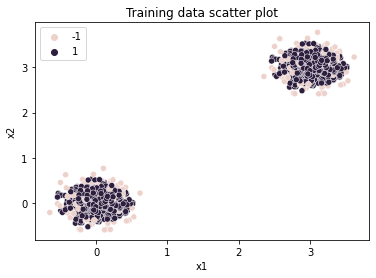

In [43]:
sns.scatterplot('x1', 'x2', data=X_train, hue=y_pred_lof_train)
plt.title("Training data scatter plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\flask_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


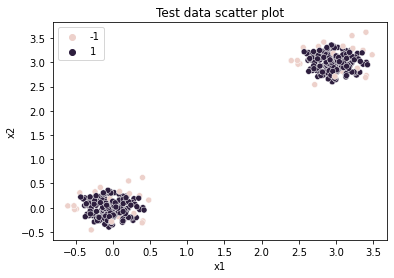

In [44]:
sns.scatterplot('x1', 'x2', data=X_test, hue=y_pred_lof_test)
plt.title("Test data scatter plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\flask_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


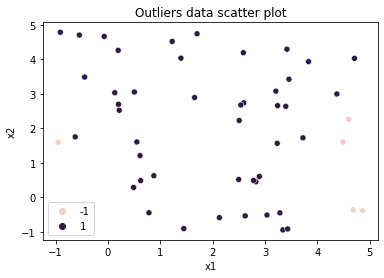

In [45]:
sns.scatterplot('x1', 'x2', data=X_outliers, hue=y_pred_lof_outliers)
plt.title("Outliers data scatter plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [61]:
X = pd.concat([X_train, X_outliers], ignore_index=True)

D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\flask_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


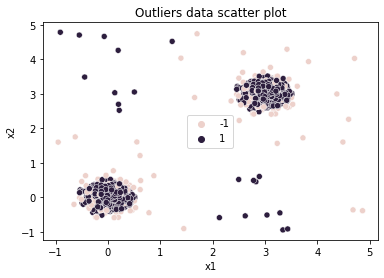

In [62]:
y_pred_lof = clf_lof.fit_predict(X)
sns.scatterplot('x1', 'x2', data=X, hue=y_pred_lof)
plt.title("Outliers data scatter plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\flask_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


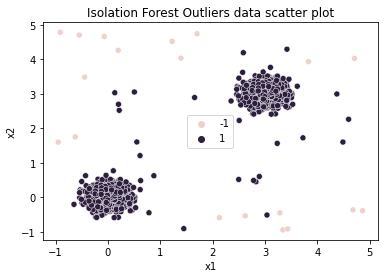

In [77]:
y_pred = clf.fit_predict(X)
sns.scatterplot('x1', 'x2', data=X, hue=y_pred)
plt.title("Isolation Forest Outliers data scatter plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## DBScan

In [46]:
from sklearn.cluster import DBSCAN

In [56]:
X_train_dbscan = DBSCAN(eps=0.075, min_samples=8)
X_train_dbscan.fit(X_train)
labels = X_train_dbscan.labels_

D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\flask_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


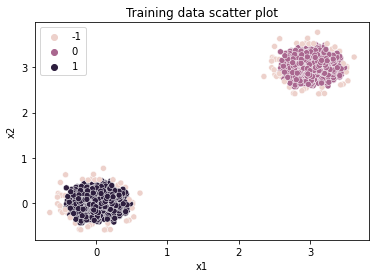

In [57]:
sns.scatterplot('x1', 'x2', data=X_train, hue=labels)
plt.title("Training data scatter plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

[0.00066621 0.00066621 0.00066621 ... 0.19171462 0.19213642 0.19213642]


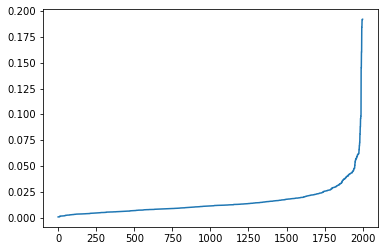

In [51]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(X_train)
distances, indices = nearest_neighbors.kneighbors(X_train)
distances = np.sort(distances, axis=0)[:, 1]
print(distances)
plt.plot(distances)
plt.show()

D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\flask_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


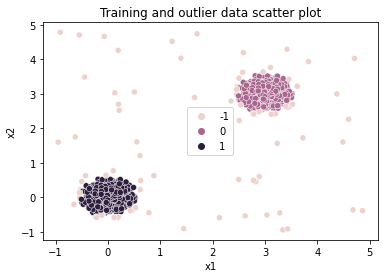

In [70]:
X_dbscan = DBSCAN(eps=0.1, min_samples=10)
X_dbscan.fit(X)
labels = X_dbscan.labels_
sns.scatterplot('x1', 'x2', data=X, hue=labels)
plt.title("Training and outlier data scatter plot")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

[6.66212608e-04 6.66212608e-04 6.66212608e-04 ... 7.50649052e-01
 7.66760548e-01 8.83316846e-01]


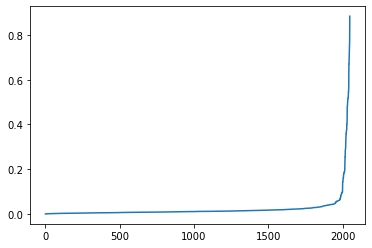

In [69]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)[:, 1]
print(distances)
plt.plot(distances)
plt.show()